# 数据清洗

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# 读取数据 
# 别忘了装xlrd
sales_df = pd.read_excel('./Online Retail.xlsx', sheet_name='Online Retail', dtype=str)

In [ ]:
sales_df.head()

In [4]:
sales_df.dtypes

InvoiceNo      object
StockCode      object
Description    object
Quantity       object
InvoiceDate    object
UnitPrice      object
CustomerID     object
Country        object
dtype: object

In [5]:
# 列名重命名
# 把InvoiceDate改为InvoiceTime
sales_df.rename(columns={'InvoiceDate': 'InvoiceTime'}, inplace= True)

In [6]:
# 删除重复值
rows_before = sales_df.shape[0]
sales_df.drop_duplicates(inplace= True)
rows_after = sales_df.shape[0]

In [7]:
print('原行数：', rows_before, '现行数：', rows_after, '删除行数:', rows_before - rows_after)

原行数： 541909 现行数： 536641 删除行数: 5268


In [8]:
# 541909-536641 =5268

In [9]:
sales_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [10]:
# 重设索引，并删除原索引
sales_df.reset_index(drop=True, inplace = True)

In [11]:
# 查看缺失值
sales_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceTime         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
# Description的缺失值不处理
# CustomerID缺的很多，但很重要，不能直接删去，用0填充。
# 填充前先确认下真的没有Id为0的客户

In [13]:
# 查看具体的缺失位置
sales_df[sales_df.isnull().values==True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country
605,536414,22139,NaN,56,2010-12-01 11:52:00,0,NaN,United Kingdom
605,536414,22139,NaN,56,2010-12-01 11:52:00,0,NaN,United Kingdom
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1409,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom


In [14]:
sales_df[sales_df['CustomerID'] == '0']

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country


In [15]:
# 填充缺失的CustomerID
sales_df['CustomerID'].fillna('0', inplace=True)

In [16]:
(sales_df['CustomerID'] == '0').sum()

135037

In [17]:
# 一致化处理 -时间
sales_df['InvoiceTime']=pd.to_datetime(sales_df['InvoiceTime'], errors='coerce')

In [18]:
sales_df['Date'] = pd.to_datetime(sales_df['InvoiceTime'].dt.date, errors='coerce')

In [19]:
sales_df['Month'] = sales_df['InvoiceTime'].astype('datetime64[M]')

In [20]:
# sales_df.Month.value_counts()

In [21]:
# 再次查看缺失值
sales_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceTime       0
UnitPrice         0
CustomerID        0
Country           0
Date              0
Month             0
dtype: int64

In [22]:
# 一致化处理
# 字符串转为数字类型
sales_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity               object
InvoiceTime    datetime64[ns]
UnitPrice              object
CustomerID             object
Country                object
Date           datetime64[ns]
Month          datetime64[ns]
dtype: object

In [23]:
sales_df['Quantity'] = sales_df['Quantity'].astype('int32')
sales_df['UnitPrice'] = sales_df['UnitPrice'].astype('float')
sales_df['CustomerID'] = sales_df['CustomerID'].astype('int32')

In [24]:
# 计算总价
sales_df['SumPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']

In [25]:
# 异常值处理

In [26]:
sales_df.describe()

,Quantity,UnitPrice,CustomerID,SumPrice
count,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11435.904653,18.123861
std,219.130156,97.233118,6795.044250,380.656263
min,-80995.000000,-11062.060000,0.000000,-168469.600000
25%,1.000000,1.250000,0.000000,3.750000
50%,3.000000,2.080000,14336.000000,9.870000
75%,10.000000,4.130000,16241.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [27]:
sales_df[(sales_df['Quantity'] <= 0)|(sales_df['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,2010-12-01,2010-12-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-01,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-01,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,2010-12-01,2010-12-01,-41.40
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-01,-19.80
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-01,-39.60
605,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,0,United Kingdom,2010-12-01,2010-12-01,0.00


In [28]:
query_c = sales_df['InvoiceNo'].str.contains('C')
# 只含取消订单
sales_cancel = sales_df.loc[query_c,:].copy()
# 只含成功订单
sales_success = sales_df.loc[-query_c,:].copy()

In [29]:
# 增加原订单号
sales_cancel['SrcInvoiceNo'] = sales_cancel['InvoiceNo'].str.split('C', expand=True)[1]

In [30]:
# 发现取消和成功订单没有交集
pd.merge(sales_cancel, sales_success, left_on='SrcInvoiceNo',right_on='InvoiceNo')

,InvoiceNo_x,StockCode_x,Description_x,Quantity_x,InvoiceTime_x,UnitPrice_x,CustomerID_x,Country_x,Date_x,Month_x,...,StockCode_y,Description_y,Quantity_y,InvoiceTime_y,UnitPrice_y,CustomerID_y,Country_y,Date_y,Month_y,SumPrice_y


In [31]:
print('取消订单行数：', sales_cancel.shape, '；成功订单行数：', sales_success.shape)

取消订单行数： (9251, 12) ；成功订单行数： (527390, 11)


In [32]:
query_free = sales_success['UnitPrice'] == 0
# 只含免费订单
sales_cancel = sales_success.loc[query_free,:].copy()
# 只含普通订单
sales_success = sales_success.loc[-query_free,:]

In [33]:
sales_success.describe()

,Quantity,UnitPrice,CustomerID,SumPrice
count,524880.000000,524880.000000,524880.000000,524880.000000
mean,10.616564,3.880407,11437.688582,20.233171
std,156.279734,42.063124,6799.537329,272.552926
min,1.000000,-11062.060000,0.000000,-11062.060000
25%,1.000000,1.250000,0.000000,3.900000
50%,4.000000,2.080000,14350.000000,9.920000
75%,11.000000,4.130000,16245.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [34]:
query_minus = sales_success['UnitPrice'] < 0

In [35]:
sales_success.loc[query_minus,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
297646,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom,2011-08-12,2011-08-01,-11062.06
297647,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom,2011-08-12,2011-08-01,-11062.06


In [36]:
sales_success = sales_success.loc[-query_minus,:]

In [37]:
sales_success.shape

(524878, 11)

In [38]:
sales_success.describe()

,Quantity,UnitPrice,CustomerID,SumPrice
count,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,11437.732164,20.275399
std,156.280031,36.093028,6799.513627,271.693566
min,1.000000,0.001000,0.000000,0.001000
25%,1.000000,1.250000,0.000000,3.900000
50%,4.000000,2.080000,14350.000000,9.920000
75%,11.000000,4.130000,16245.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


# 销售情况的描述性统计

## 订单维度

In [39]:
invoice_grouped = sales_success.groupby('InvoiceNo')[['Quantity', 'SumPrice']].sum()

In [40]:
# 笔单价 与 连带率
invoice_grouped.describe()

,Quantity,SumPrice
count,19960.000000,19960.000000
mean,279.179359,533.171884
std,955.011810,1780.412288
min,1.000000,0.380000
25%,69.000000,151.695000
50%,150.000000,303.300000
75%,296.000000,493.462500
max,80995.000000,168469.600000


Text(0.5, 0, 'SumPrice')

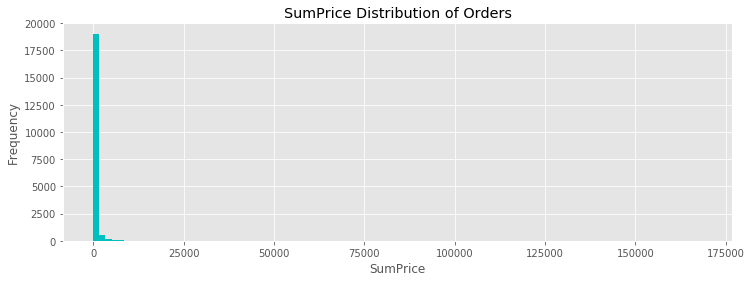

In [41]:
invoice_grouped['SumPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('SumPrice Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

Text(0.5, 0, 'SumPrice')

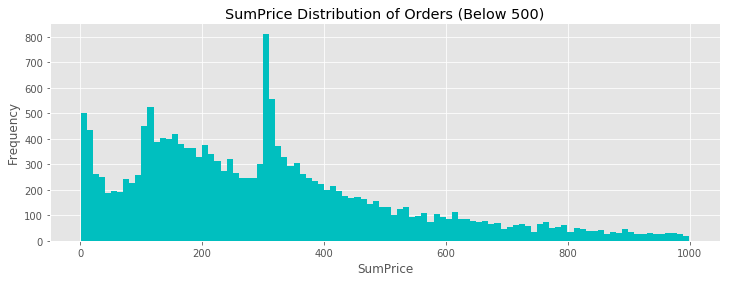

In [42]:
invoice_grouped[invoice_grouped.SumPrice < 1000]['SumPrice'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('SumPrice Distribution of Orders (Below 500)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

Text(0.5, 0, 'Quantity')

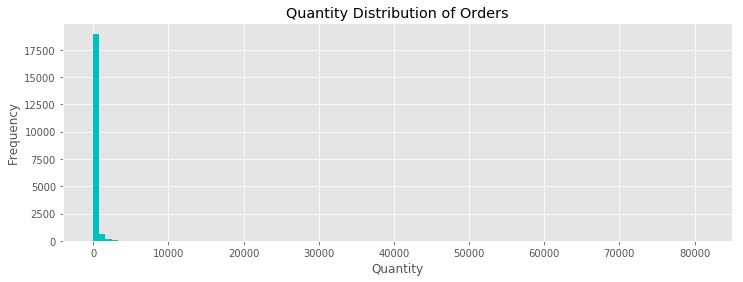

In [43]:
invoice_grouped['Quantity'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

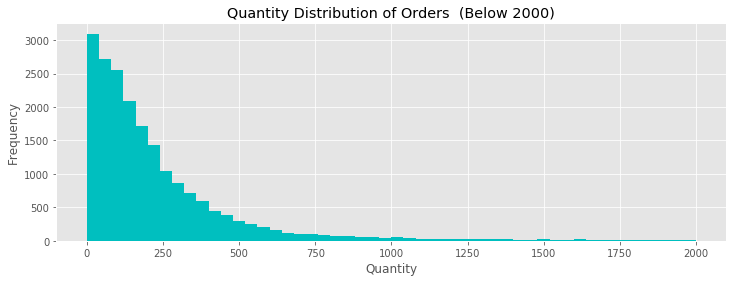

In [44]:
invoice_grouped[invoice_grouped.Quantity < 2000]['Quantity'].hist(bins = 50, figsize = (12, 4), color = 'c')
plt.title('Quantity Distribution of Orders  (Below 2000)')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

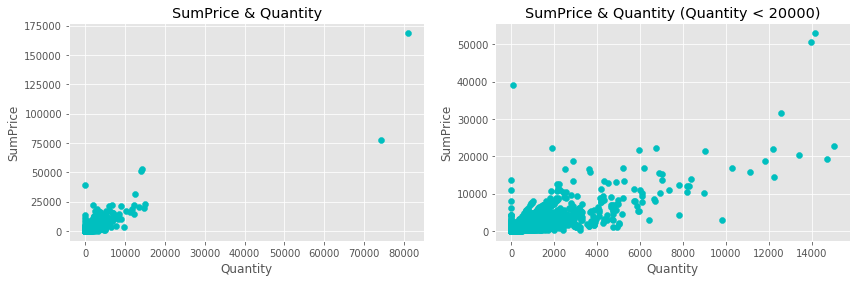

In [45]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(invoice_grouped['Quantity'], invoice_grouped['SumPrice'], color = 'c')
plt.title('SumPrice & Quantity')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(invoice_grouped[invoice_grouped.Quantity < 20000]['Quantity'], invoice_grouped[invoice_grouped.Quantity < 20000]['SumPrice'], color = 'c')
plt.title('SumPrice & Quantity (Quantity < 20000)')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

In [46]:
#invoice_grouped.plot.scatter(x='Quantity', y = 'SumPrice', color = 'c')
#invoice_grouped[invoice_grouped.Quantity < 20000].plot.scatter(x='Quantity', y = 'SumPrice',  color = 'c')

## 客户维度

In [47]:
# 仅对含有CustomerID的客户进行分析：

In [48]:
sales_customer = sales_success[sales_success['CustomerID'] != 0].copy()

In [49]:
# 这里reset_index重设索引
# 为了统计订单数量 先对客户编号和订单编号分组，再对订单编号分组。

In [50]:
customer_grouped = sales_customer.groupby(['CustomerID', 'InvoiceNo'])[['Quantity', 'SumPrice']].sum().reset_index()

In [51]:
customer_grouped = customer_grouped.groupby('CustomerID').agg({'InvoiceNo': np.size, 'Quantity': np.sum, 'SumPrice': np.sum})

In [52]:
customer_grouped.describe()

,InvoiceNo,Quantity,SumPrice
count,4338.000000,4338.000000,4338.000000
mean,4.272015,1187.644537,2048.688081
std,7.697998,5043.619654,8985.230220
min,1.000000,1.000000,3.750000
25%,1.000000,159.000000,306.482500
50%,2.000000,378.000000,668.570000
75%,5.000000,989.750000,1660.597500
max,209.000000,196915.000000,280206.020000


Text(0.5, 0, 'Quantity')

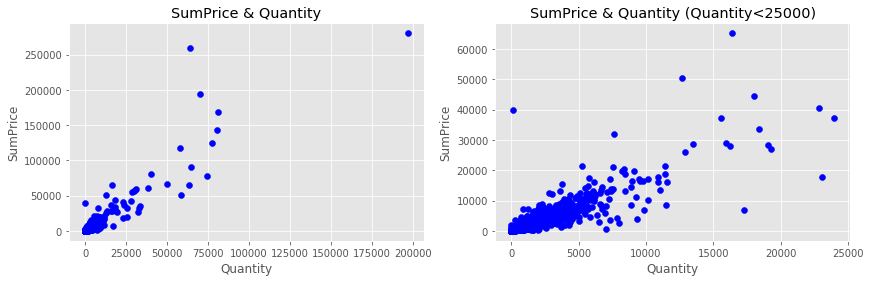

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(customer_grouped['Quantity'], customer_grouped['SumPrice'], color = 'b')
plt.title('SumPrice & Quantity')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(customer_grouped[customer_grouped.Quantity < 25000]['Quantity'], customer_grouped[customer_grouped.Quantity < 25000]['SumPrice'], color = 'b')
plt.title('SumPrice & Quantity (Quantity<25000)')
plt.ylabel('SumPrice')
plt.xlabel('Quantity')

Text(0.5, 0, 'SumPrice')

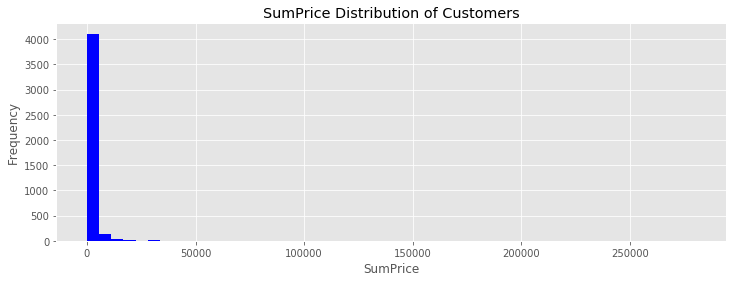

In [54]:
customer_grouped.SumPrice.hist(bins = 50, figsize = (12, 4), color = 'b')
plt.title('SumPrice Distribution of Customers')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

Text(0.5, 0, 'SumPrice')

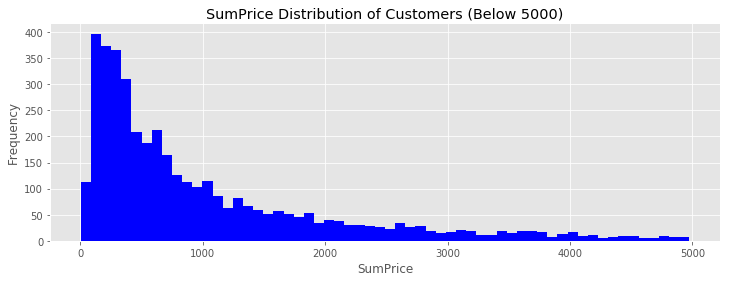

In [55]:
customer_grouped[customer_grouped.SumPrice < 5000].SumPrice.hist(bins = 60, figsize = (12, 4), color = 'b')
plt.title('SumPrice Distribution of Customers (Below 5000)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

## 时间维度

In [56]:
# 按订单号分组，提取出我们需要的信息：
time_grouped = sales_success.groupby('InvoiceNo').agg({'Date': np.min, 'Month': np.min, 'Quantity': np.sum, 'SumPrice': np.sum}).reset_index()

In [57]:
time_grouped.head()

,InvoiceNo,Date,Month,Quantity,SumPrice
0,536365,2010-12-01,2010-12-01,40,139.12
1,536366,2010-12-01,2010-12-01,12,22.20
2,536367,2010-12-01,2010-12-01,83,278.73
3,536368,2010-12-01,2010-12-01,15,70.05
4,536369,2010-12-01,2010-12-01,3,17.85


Text(0, 0.5, 'Order quantities')

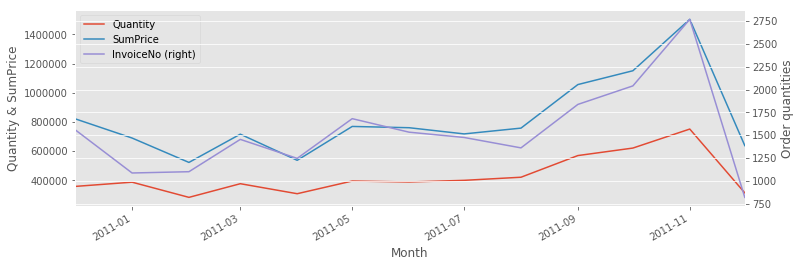

In [58]:
# 以月份为单位进行折线图绘制，这里对Quantity和SumPrice分组求和，代表每月的销量和销售额，对InvoiceNo计数，代表每月的订单数
# 此处采用双坐标图，销量和销售额为左轴，参数secondary_y = 'InvoiceNo'表示订单数为右轴
month = time_grouped.groupby('Month').agg({'Quantity': np.sum, 'SumPrice': np.sum, 'InvoiceNo': np.size}).plot(secondary_y = 'InvoiceNo', x_compat=True, figsize = (12, 4))
month.set_ylabel('Quantity & SumPrice')
month.right_ax.set_ylabel('Order quantities')

In [59]:
# 将日期设为索引
time_grouped = time_grouped.set_index('Date')

Text(0, 0.5, 'Order quantities')

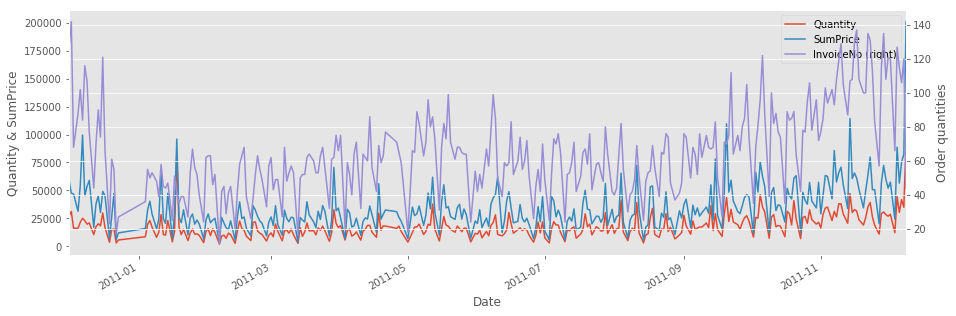

In [60]:
# 按日绘制折线图
day = time_grouped.groupby('Date').agg({'Quantity': np.sum, 'SumPrice': np.sum, 'InvoiceNo': np.size}).plot(secondary_y = 'InvoiceNo', figsize = (15, 5))
day.set_ylabel('Quantity & SumPrice')
day.right_ax.set_ylabel('Order quantities')

Text(0, 0.5, 'Order quantities')

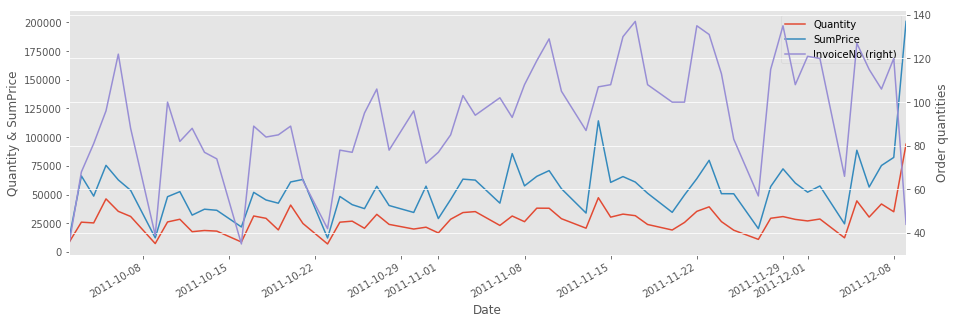

In [61]:
# 选取2011年10月1日至2011年12月9日
day_part = time_grouped['2011-10-01':'2011-12-09'].groupby('Date').agg({'Quantity': np.sum, 'SumPrice': np.sum, 'InvoiceNo': np.size}).plot(
    secondary_y = 'InvoiceNo', figsize = (15, 5))
day_part.set_ylabel('Quantity & SumPrice')
day_part.right_ax.set_ylabel('Order quantities')

In [62]:
# 将当日的销售详单拉取出来
sales_success[sales_success.Date == '2011-12-09'].sort_values(by = 'SumPrice', ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
535160,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,2011-12-09,2011-12-01,168469.60
536279,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,0,United Kingdom,2011-12-09,2011-12-01,1714.17
535647,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,0,United Kingdom,2011-12-09,2011-12-01,933.17
535164,581485,20749,ASSORTED COLOUR MINI CASES,84,2011-12-09 09:38:00,6.35,17389,United Kingdom,2011-12-09,2011-12-01,533.40
536434,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,2011-12-09,2011-12-01,469.44


##  商品维度

In [63]:
# 价格会波动
sales_success.loc[sales_success['StockCode'] == '10002',:].UnitPrice.value_counts()

0.85    50
1.66    14
1.63     7
Name: UnitPrice, dtype: int64

In [64]:
goods_grouped = sales_success.groupby('StockCode')[['Quantity', 'SumPrice']].sum()

In [65]:
goods_grouped['AvgPrice'] = goods_grouped['SumPrice'] / goods_grouped['Quantity']

In [66]:
goods_grouped.head()

,Quantity,SumPrice,AvgPrice
StockCode,,,
10002,860,759.89,0.883593
10080,303,119.09,0.393036
10120,192,40.32,0.210000
10123C,5,3.25,0.650000
10124A,16,6.72,0.420000


Text(0.5, 0, 'SumPrice')

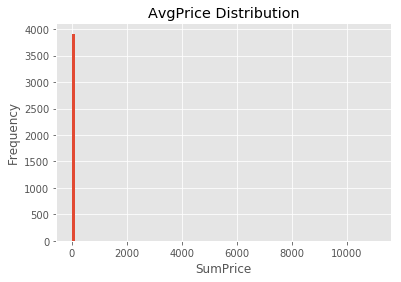

In [67]:
goods_grouped.AvgPrice.hist(bins=100)
plt.title('AvgPrice Distribution')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

Text(0.5, 0, 'SumPrice')

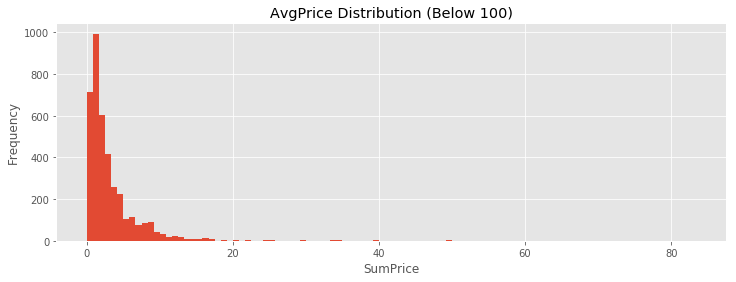

In [68]:
goods_grouped[goods_grouped.AvgPrice < 100].AvgPrice.hist(bins=100,figsize = (12, 4))
plt.title('AvgPrice Distribution (Below 100)')
plt.ylabel('Frequency')
plt.xlabel('SumPrice')

Text(0.5, 0, 'AvgPrice')

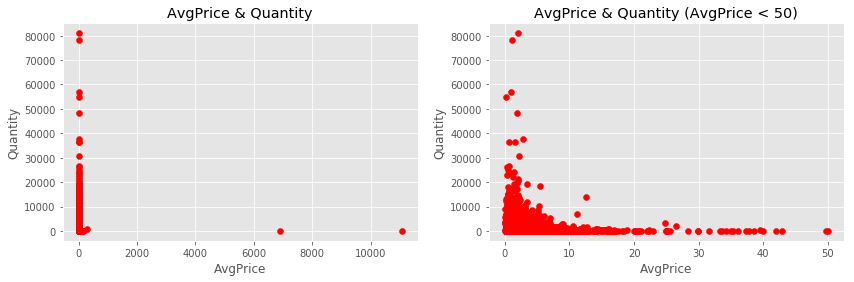

In [69]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['Quantity'], color = 'r')
plt.title('AvgPrice & Quantity')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 50]['AvgPrice'], goods_grouped[goods_grouped.AvgPrice < 50]['Quantity'], color = 'r')
plt.title('AvgPrice & Quantity (AvgPrice < 50)')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

Text(0.5, 0, 'AvgPrice')

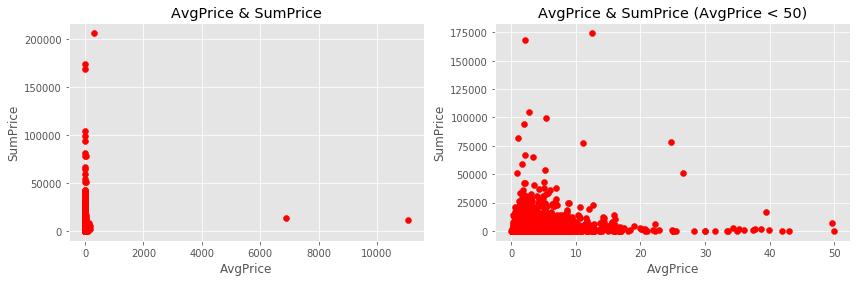

In [70]:
# 单价和总金额的散点图
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['SumPrice'], color = 'r')
plt.title('AvgPrice & SumPrice')
plt.ylabel('SumPrice')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 50]['AvgPrice'], goods_grouped[goods_grouped.AvgPrice < 50]['SumPrice'], color = 'r')
plt.title('AvgPrice & SumPrice (AvgPrice < 50)')
plt.ylabel('SumPrice')
plt.xlabel('AvgPrice')

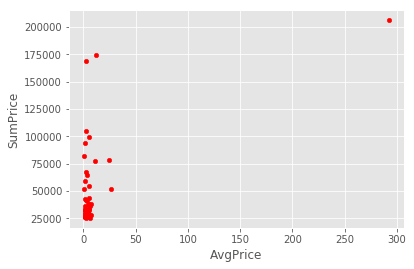

In [71]:
goods_grouped[goods_grouped.SumPrice > 25000].plot.scatter(x='AvgPrice', y='SumPrice', c='r')
# 创造了总收入25000英镑以上的商品基本集中在单价25磅内 

## 区位维度

In [72]:
# 提取出一张客户ID和国家的关系表
sales_country = sales_customer[['CustomerID', 'Country']].drop_duplicates(subset=['CustomerID', 'Country'])

In [73]:
# 按客户分组算总金额
country_grouped = sales_customer.groupby('CustomerID')[['SumPrice']].sum()

In [74]:
# 将上述两张表合并
country_grouped = country_grouped.merge(sales_country, on=['CustomerID'])

In [75]:
# 按国家再次分组，计算出各国客户的消费总额和客户总数
country_grouped = country_grouped.groupby('Country').agg({'SumPrice': np.sum, 'CustomerID': np.size})

In [76]:
# 新增AvgAmount字段，用于存放该国家客户的人均消费金额
country_grouped['AvgAmount'] = country_grouped['SumPrice'] / country_grouped['CustomerID']

In [77]:
country_grouped.sort_values(by = 'SumPrice',ascending = False).head(20)

,SumPrice,CustomerID,AvgAmount
Country,,,
United Kingdom,7285024.644,3920,1858.424654
Netherlands,285446.340,9,31716.260000
EIRE,265262.460,3,88420.820000
Germany,228678.400,94,2432.748936
France,208934.310,87,2401.543793
Australia,139843.950,9,15538.216667
Spain,66470.260,30,2215.675333
Switzerland,57222.850,21,2724.897619
Belgium,47971.210,25,1918.848400


# 生命周期

In [78]:
# 有CustomerID客户的子表
# sales_customer = sales_success[sales_success['CustomerID'] != 0].copy()

In [79]:
# 客户的初次消费时间
mindate = sales_customer.groupby('CustomerID')[['Date']].min()
# 客户的末次消费时间
maxdate = sales_customer.groupby('CustomerID')[['Date']].max()

In [80]:
mindate.Date.value_counts().head(10)

2010-12-01    95
2010-12-02    93
2010-12-08    83
2010-12-06    70
2010-12-05    69
2010-12-09    67
2010-12-16    58
2010-12-07    50
2010-12-03    46
2010-12-15    42
Name: Date, dtype: int64

In [81]:
maxdate.Date.value_counts().head(10)

2011-12-08    103
2011-12-06     94
2011-12-05     94
2011-12-07     90
2011-12-01     79
2011-11-29     77
2011-11-22     74
2011-12-02     72
2011-11-30     71
2011-11-17     64
Name: Date, dtype: int64

In [82]:
(maxdate - mindate).head(5)
# 0days表示只在某日消费过，1days表示留存至次日。

,Date
CustomerID,
12346,0 days
12347,365 days
12348,283 days
12349,0 days
12350,0 days


In [83]:
life_time = maxdate - mindate

In [84]:
# 结合describe和直方图看一下分布
life_time.describe()

,Date
count,4338
mean,130 days 18:31:02.240663
std,132 days 05:03:08.004046
min,0 days 00:00:00
25%,0 days 00:00:00
50%,93 days 00:00:00
75%,252 days 00:00:00
max,373 days 00:00:00


In [85]:
# 因为这里的数据类型是timedelta时间，它无法直接作出直方图，所以转换成数值。
life_time['life_time'] = life_time['Date'].dt.days

Text(0.5, 0, 'Life time (days)')

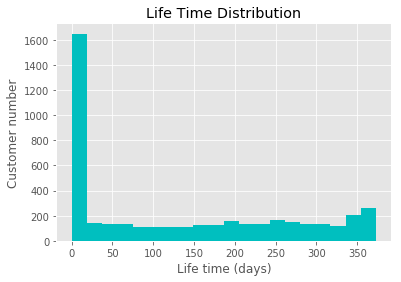

In [86]:
life_time['life_time'].hist(bins = 20, color = 'c')
plt.title('Life Time Distribution')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')

Text(0.5, 0, 'Life time (days)')

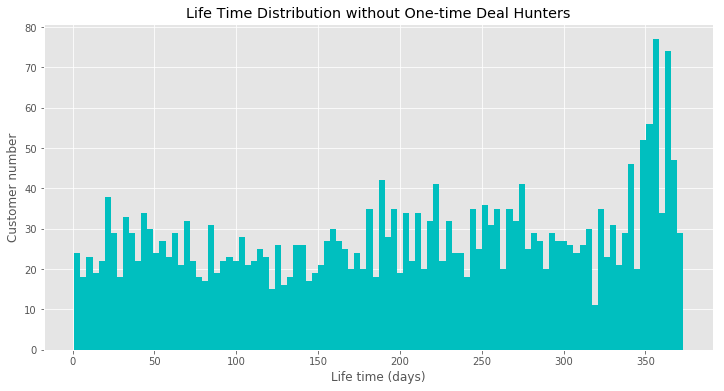

In [87]:
life_time[life_time['life_time'] > 0].life_time.hist(bins = 100, figsize = (12, 6), color = 'c')
plt.title('Life Time Distribution without One-time Deal Hunters')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')

In [88]:
bin = [0, 75, 170, 330, 400]
pd.cut(life_time[life_time['life_time'] > 0].life_time, bins=bin).value_counts()

(170, 330]    1198
(75, 170]      577
(0, 75]        517
(330, 400]     498
Name: life_time, dtype: int64

In [89]:
# 消费两次及以上的用户平均生命周期
life_time[life_time['life_time'] > 0].life_time.mean()

203.32867383512544

#  留存情况

In [90]:
customer_retention = sales_customer.merge(mindate, on = 'CustomerID', how = 'inner', suffixes = ('', 'Min'))

In [91]:
customer_retention.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice,DateMin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,20.34,2010-12-01


In [92]:
customer_retention['DateDiff'] = (customer_retention.Date - customer_retention.DateMin).dt.days

In [93]:
date_bins = [0, 3, 7, 30, 60, 90, 180]

In [94]:
customer_retention['DateDiffBin'] = pd.cut(customer_retention.DateDiff, bins = date_bins)

In [95]:
customer_retention['DateDiffBin'].value_counts()

(90, 180]    74528
(30, 60]     28252
(60, 90]     25876
(7, 30]      17148
(3, 7]        3559
(0, 3]        1311
Name: DateDiffBin, dtype: int64

In [96]:
customer_retention.DateMin.describe()
# 也即首次消费在2011-06-11日前的客户

count                  392692
unique                    305
top       2010-12-01 00:00:00
freq                    35425
first     2010-12-01 00:00:00
last      2011-12-09 00:00:00
Name: DateMin, dtype: object

In [97]:
# 这里数据透视表会过滤全为NaN的客户，即透视表中全为消费2次及以上的客户
retention_pivot = customer_retention.pivot_table(index = ['CustomerID'], columns = ['DateDiffBin'], values = ['SumPrice'], aggfunc= np.sum)

In [98]:
retention_pivot.head(100)

SumPrice                                            
DateDiffBin   (0, 3] (3, 7]  (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                      
12347            NaN    NaN      NaN   475.39      NaN    636.25
12348            NaN    NaN      NaN   227.44      NaN    367.00
12352            NaN    NaN  1104.98   160.33      NaN       NaN
12356            NaN    NaN      NaN      NaN   481.46       NaN
12358            NaN    NaN      NaN      NaN      NaN    683.20
12359            NaN    NaN  1838.91      NaN      NaN   1109.32
12360            NaN    NaN      NaN      NaN   534.70   1043.78
12362            NaN    NaN      NaN      NaN   495.24    773.01
12363            NaN    NaN      NaN      NaN      NaN    252.90
12364            NaN    NaN      NaN    79.80   299.06    310.32
12370         277.20    NaN      NaN      NaN   938.39       NaN
12371            NaN    NaN   360.00      NaN      NaN       NaN
12372            NaN    NaN      NaN      NaN   515.70       NaN
12375            NaN    NaN      NaN      NaN   227.20       NaN
12377            NaN    NaN      NaN   626.60      NaN       NaN
12379            NaN    NaN      NaN      NaN   392.40       NaN
12380            NaN    NaN      NaN      NaN      NaN   2117.26
12381            NaN    NaN      NaN     6.00   423.56    147.01
12383            NaN    NaN   651.16      NaN   357.07    241.61
12384            NaN    NaN      NaN      NaN      NaN    292.58
12386            NaN    NaN   143.00      NaN      NaN       NaN
12388            NaN    NaN   124.05   210.90      NaN    902.09
12393         177.00    NaN      NaN      NaN   421.60       NaN
12394            NaN    NaN      NaN      NaN      NaN    891.40
12395            NaN    NaN   333.82      NaN   231.51    658.29
12397            NaN    NaN      NaN      NaN      NaN   1195.09
12399            NaN    NaN      NaN   480.90   130.08    209.62
12406            NaN    NaN      NaN      NaN      NaN   1794.05
12407            NaN    NaN   269.66      NaN      NaN    911.40
12408            NaN    NaN      NaN      NaN   654.18    642.28
...              ...    ...      ...      ...      ...       ...
12490            NaN    NaN      NaN      NaN      NaN    815.56
12492            NaN    NaN      NaN   136.82      NaN       NaN
12493            NaN    NaN      NaN   201.24      NaN       NaN
12494            NaN   4.95      NaN      NaN   250.00    403.09
12498            NaN    NaN      NaN   156.45      NaN       NaN
12500            NaN    NaN      NaN   623.82   241.44    185.64
12502            NaN    NaN      NaN   702.80      NaN    522.60
12504            NaN    NaN    32.65      NaN      NaN       NaN
12507            NaN    NaN      NaN      NaN      NaN    858.65
12508         123.08    NaN      NaN      NaN      NaN       NaN
12516            NaN    NaN      NaN      NaN      NaN    728.86
12517            NaN    NaN      NaN      NaN   771.75    960.15
12518            NaN    NaN      NaN   905.96   486.96    339.14
12520            NaN    NaN   246.54      NaN   463.60    348.29
12522            NaN    NaN   103.32      NaN      NaN       NaN
12523            NaN    NaN      NaN   143.40   253.84       NaN
12524            NaN    NaN      NaN  1000.78      NaN   1784.31
12526            NaN    NaN      NaN   519.28      NaN    277.08
12527            NaN    NaN      NaN   152.40      NaN       NaN
12528            NaN    NaN      NaN   278.13      NaN    281.71
12530            NaN    NaN      NaN      NaN      NaN    417.60
12535            NaN    NaN      NaN      NaN      NaN    344.90
12536            NaN    NaN  8322.12      NaN      NaN       NaN
12539            NaN    NaN  1715.85      NaN  1085.99       NaN
12540            NaN    NaN  1147.18   288.98      NaN   4185.35
12541            NaN    NaN      NaN      NaN      NaN    223.74
12546            NaN    NaN      NaN   401.30      NaN       NaN
12547            NaN    NaN      NaN      NaN  

In [99]:
retention_pivot.mean()

          DateDiffBin
SumPrice  (0, 3]         587.662911
          (3, 7]         366.199325
          (7, 30]        519.275532
          (30, 60]       595.992305
          (60, 90]       593.322921
          (90, 180]      984.703246
dtype: float64

In [100]:
retention_pivot_trans = retention_pivot.fillna(0).applymap(lambda x:1 if x > 0 else 0)

In [101]:
retention_pivot_trans.head()
# 将数据转换成是否，1代表在该时间段内有后续消费，0代表没有。

SumPrice                                           
DateDiffBin   (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                     
12347              0      0       0        1        0         1
12348              0      0       0        1        0         1
12352              0      0       1        1        0         0
12356              0      0       0        0        1         0
12358              0      0       0        0        0         1

In [102]:
retention_pivot_trans.sum()/ retention_pivot_trans.count()

          DateDiffBin
SumPrice  (0, 3]         0.032075
          (3, 7]         0.066179
          (7, 30]        0.270808
          (30, 60]       0.405197
          (60, 90]       0.373934
          (90, 180]      0.678035
dtype: float64

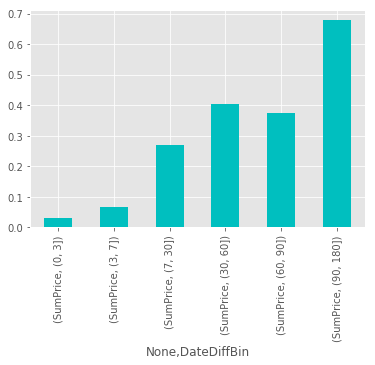

In [103]:
(retention_pivot_trans.sum()/ retention_pivot_trans.count()).plot.bar(color = 'c')

# 购买周期

In [104]:
sales_cycle = customer_retention.drop_duplicates(subset=['CustomerID', 'Date'], keep='first')

In [105]:
sales_cycle.sort_values(by = 'Date',ascending = True)  

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice,DateMin,DateDiff,DateDiffBin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,15.30,2010-12-01,0,NaN
32284,536588,22960,JAM MAKING SET WITH JARS,6,2010-12-01 16:49:00,4.25,17069,United Kingdom,2010-12-01,2010-12-01,25.50,2010-12-01,0,NaN
32262,536587,37448,CERAMIC CAKE DESIGN SPOTTED MUG,12,2010-12-01 16:33:00,1.49,14142,United Kingdom,2010-12-01,2010-12-01,17.88,2010-12-01,0,NaN
6814,536405,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,128,2010-12-01 11:32:00,2.55,14045,United Kingdom,2010-12-01,2010-12-01,326.40,2010-12-01,0,NaN
6820,536408,22537,MAGIC DRAWING SLATE DINOSAUR,24,2010-12-01 11:41:00,0.42,14307,United Kingdom,2010-12-01,2010-12-01,10.08,2010-12-01,0,NaN
7000,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908,United Kingdom,2010-12-01,2010-12-01,19.05,2010-12-01,0,NaN
7054,536412,20728,LUNCH BAG CARS BLUE,3,2010-12-01 11:49:00,1.65,17920,United Kingdom,2010-12-01,2010-12-01,4.95,2010-12-01,0,NaN
32098,536586,22846,BREAD BIN DINER STYLE RED,8,2010-12-01 16:25:00,14.95,18229,United Kingdom,2010-12-01,2010-12-01,119.60,2010-12-01,0,NaN
32069,536585,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2010-12-01 16:24:00,9.95,17460,United Kingdom,2010-12-01,2010-12-01,19.90,2010-12-01,0,NaN
31972,536582,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2010-12-01 16:21:00,1.25,12947,United Kingdom,2010-12-01,2010-12-01,15.00,2010-12-01,0,NaN


In [106]:
def diff(group):
    d = group.DateDiff - group.DateDiff.shift()
    return d

In [107]:
last_diff = sales_cycle.groupby('CustomerID').apply(diff)

In [108]:
last_diff.head(10)
# 第二列是索引值，第三列表示本次消费同上次消费的时间差

CustomerID        
12346       193894     NaN
12347       93546      NaN
            93577     50.0
            93606     71.0
            93630     63.0
            93648     54.0
            93670     90.0
            93717     37.0
12348       156820     NaN
            156837    40.0
Name: DateDiff, dtype: float64

In [109]:
sales_cycle[customer_retention['CustomerID'] == 12347]

/home/opt/anaconda3/envs/nv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice,DateMin,DateDiff,DateDiffBin
93546,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,2010-12-07,2010-12-01,25.20,2010-12-07,0,NaN
93577,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347,Iceland,2011-01-26,2011-01-01,20.40,2010-12-07,50,"(30.0, 60.0]"
93606,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347,Iceland,2011-04-07,2011-04-01,17.00,2010-12-07,121,"(90.0, 180.0]"
93630,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347,Iceland,2011-06-09,2011-06-01,24.96,2010-12-07,184,NaN
93648,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347,Iceland,2011-08-02,2011-08-01,13.20,2010-12-07,238,NaN
93670,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,2011-10-31 12:25:00,3.75,12347,Iceland,2011-10-31,2011-10-01,45.00,2010-12-07,328,NaN
93717,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347,Iceland,2011-12-07,2011-12-01,17.40,2010-12-07,365,NaN


In [110]:
last_diff.describe()

count    12425.000000
mean        45.656901
std         53.067262
min          1.000000
25%         12.000000
50%         28.000000
75%         58.000000
max        366.000000
Name: DateDiff, dtype: float64

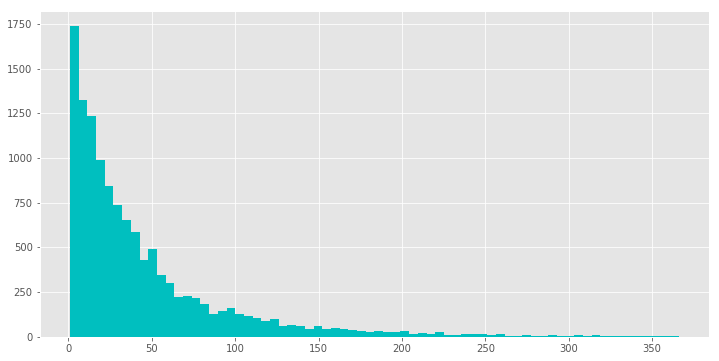

In [111]:
last_diff.hist(bins = 70,figsize = (12, 6), color = 'c')

In [112]:
last_diff_customer = last_diff.groupby('CustomerID').mean()

In [113]:
last_diff_customer.mean()

78.42671569042719

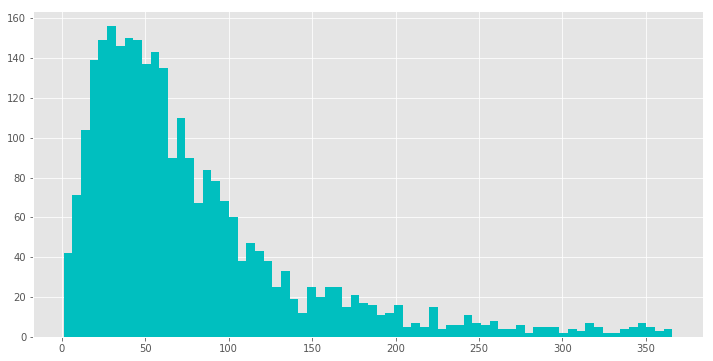

In [114]:
last_diff_customer.hist(bins = 70,figsize = (12, 6), color = 'c')